# Aula 2: Tratamiento de datos y primeros gráficos
Inmersión de datos con Python 2023, Alura

## Environment config

In [39]:
import pandas as pd

inmuebles = pd.read_csv('./datasheet/inmuebles_bogota.csv')

### Set number display format

In [40]:
# enteros con 2 decimales
pd.set_option('display.precision',2)

# flotantes con 2 decimales
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Data treatment
### Rename columns

In [41]:
newnames = {'Baños' : 'Banios', 'Área' : 'Area'}
inmuebles = inmuebles.rename(columns=newnames)

### Turn string to float64

In [42]:
# Get array ['$','3.200']
prices = inmuebles.Valor.str.split(expand=True)

ptype = prices[0]
pvalue = prices[1]

# remove . from numbers (3.200 => 3200)
pvalue = pvalue.str.replace('.','')
# change data type from string (object) to flat64
pvalue = pvalue.astype('float')
# prices will be displayed in millions of pesos
pvalue = pvalue/1000000

# Save values in inmuebles dataframe 
inmuebles['Moneda'] = ptype
inmuebles['Precio'] = pvalue

## Graphics

In [32]:
inmuebles['Precio'].describe()

count    9520.00
mean      602.06
std       704.60
min        60.00
25%       250.00
50%       409.18
75%       680.00
max     16000.00
Name: Precio, dtype: float64

#### Pandas histogram

<Axes: ylabel='Frequency'>

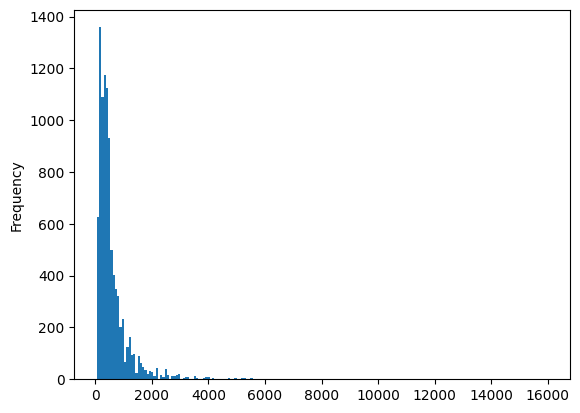

In [38]:
inmuebles['Precio'].plot.hist(bins=200)

### Matplot lib


C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isi

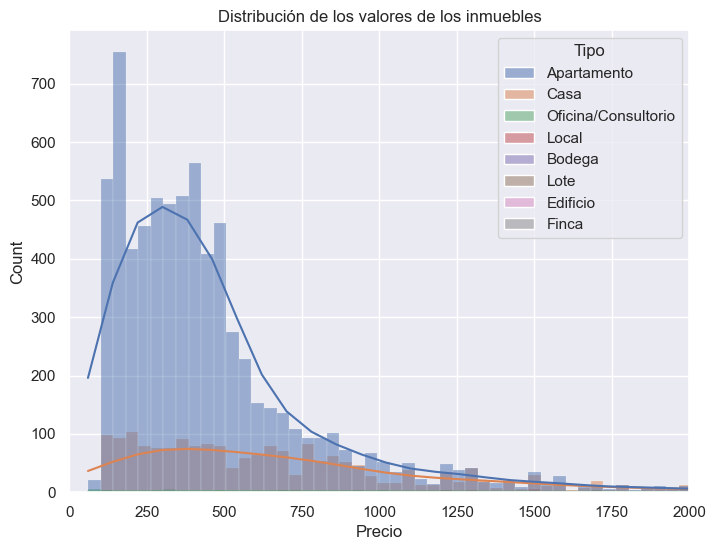

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a matplotlib 'figure', a kind of frame for our pictures
# witdh=10, height=8
plt.figure(figsize=(8,6))
hist = sns.histplot(data=inmuebles, x='Precio',kde=True, hue='Tipo')
hist.set_title('Distribución de los valores de los inmuebles')
plt.xlim((0,2000))
plt.savefig('./output_images/values_distribution.png',format='png')
plt.show()


C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isi

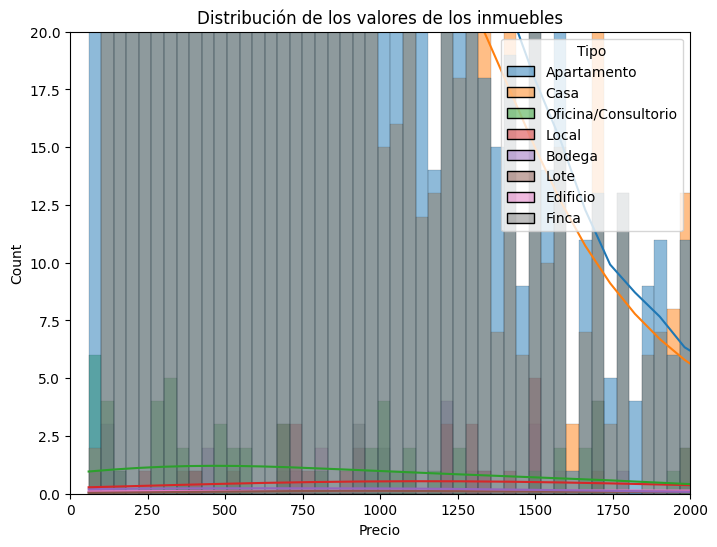

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a matplotlib figure, witdh=10, height=8
plt.figure(figsize=(8,6))
hist = sns.histplot(data=inmuebles, x='Precio',kde=True, hue='Tipo')
hist.set_title('Distribución de los valores de los inmuebles')
plt.xlim((0,2000))
plt.ylim((0,20))
plt.savefig('./output_images/type_price_distr.png',format='png')
plt.show()

## Desafíos
1. Mostrar solo 3 tipos de inmuebles en el histograma
2. Aumentar el tamaño de los labels y añadir labels
3. Obtener precio del metro cuadrado por barrio y graficar de la forma más apropiada
4. Conclusiones e insights del análisis

### 1. Mostrar los 3 tipos de inmuebles más comunes

In [124]:
type_filter = ((inmuebles.Tipo == 'Apartamento') | (inmuebles.Tipo == 'Casa') | (inmuebles.Tipo == 'Oficina/Consultorio') )
types_table = inmuebles[type_filter]
types_table


,Tipo,Descripcion,Habitaciones,Banios,Area,Barrio,UPZ,Valor,Moneda,Precio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360.00
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670.00
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120.00
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890.00
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970.00
...,...,...,...,...,...,...,...,...,...,...
9514,Casa,Casa en venta en Kennedy,4,2,240,Kennedy,Kennedy Central,$ 555.000.000,$,555.00
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,$,290.00
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,$,670.00
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,$,335.00


In [126]:
types_table.groupby('Tipo').agg(
    count=pd.NamedAgg(column='Tipo',aggfunc='count')
)

,count
Tipo,
Apartamento,7327
Casa,2043
Oficina/Consultorio,60


C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Micaela Estrella\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isi

<Axes: xlabel='Precio', ylabel='Count'>

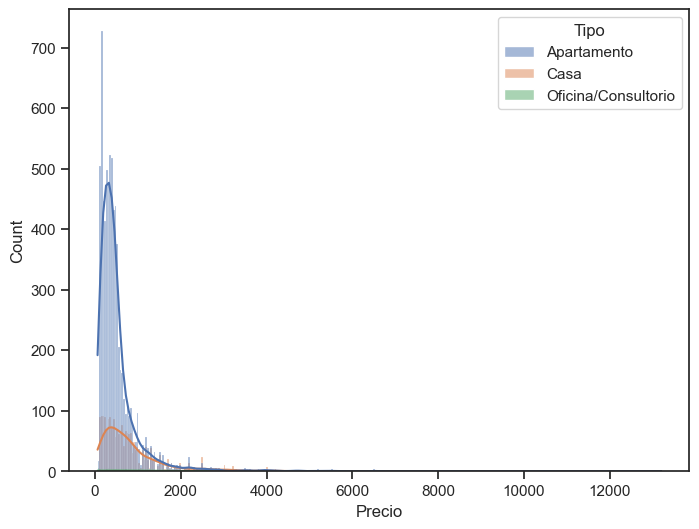

In [129]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style='ticks')

plt.figure(figsize=(8,6))
sns.histplot(
    data=types_table,
    kde=True,
    x='Precio', hue='Tipo'
)


In [130]:
types_table.groupby('Tipo').describe()

Habitaciones                                       Banios  \
                           count mean  std  min  25%  50%  75%    max   count   
Tipo                                                                            
Apartamento              7327.00 2.59 0.93 1.00 2.00 3.00 3.00  32.00 7327.00   
Casa                     2043.00 4.64 3.37 1.00 3.00 4.00 5.00 110.00 2043.00   
Oficina/Consultorio        60.00 2.70 2.66 1.00 1.00 2.00 3.00  15.00   60.00   

                          ...   Area            Precio                       \
                    mean  ...    75%       max   count   mean     std   min   
Tipo                      ...                                                 
Apartamento         2.17  ... 102.00  15920.00 7327.00 519.14  598.95 79.00   
Casa                3.34  ... 290.00 166243.00 2043.00 827.05  781.41 85.00   
Oficina/Consultorio 1.97  ... 200.00    872.00   60.00 956.76 1034.54 60.00   

                                                    
                       25%    50%     75%      max  
Tipo                                                
Apartamento         236.50 380.00  559.97 13200.00  
Casa                330.00 620.00  997.00  8800.00  
Oficina/Consultorio 308.75 700.00 1312.50  6720.79  

[3 rows x 32 columns]